# Script for News Data Analysis

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient('mongodb://localhost:27017/somanews')
client.somanews.authenticate('ssomanews', 'ssomanews1029')
db = client.get_database('somanews')
articles = db.get_collection('crawledArticles')

In [4]:
train = pd.DataFrame(list(articles.find()))
client.close()

## Counting Newsdata

In [5]:
train["newsNum"] = 1
train.set_index(train['publishedAt'], inplace=True)
weekly_df = train.resample('W-Mon').agg({'newsNum': np.sum}).fillna(0)

In [19]:
x_list = weekly_df.index.tolist()
y_list = weekly_df['newsNum'].tolist()
index = np.arange(len(x_list))

## Visualization - Graph

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [8]:
krfont = {'family':'NanumGothic', 'size': 7}
rc('font', **krfont)

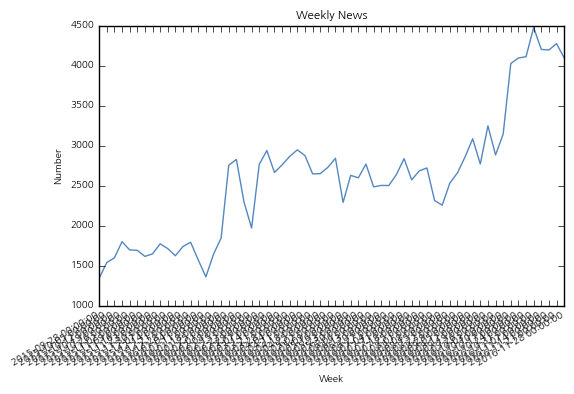

In [20]:
plt.xlabel('Week')
plt.ylabel('Number')
plt.title('Weekly News')
plt.xticks(index, x_list)
plt.plot(index, y_list, color='#5487C0')
plt.gcf().autofmt_xdate()
plt.show()